In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
from rdkit.Chem.Lipinski import RotatableBondSmarts
from rdkit.Chem import rdMolHash
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
#import pyvis
#from pyvis.network import Network
import inspect

print('RDKit version: ',rdBase.rdkitVersion)
print('MatplotLib version:', mpl.__version__)
#print('Pyvis version:', pyvis.__version__)

IPythonConsole.molSize = 500, 500

RDKit version:  2020.09.1
MatplotLib version: 3.5.0


#### svg drawing function

In [20]:
def moltosvg(mol,molSize=(450,250),kekulize=True):
    mc=rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    opts = drawer.drawOptions()
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

## Define input molecules

In [21]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')

## Define scaffold network parameters

In [22]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()

## try out BRICS bond breaking rules:
#params = rdScaffoldNetwork.BRICSScaffoldParams()

## try out custom bond breaking rules:
#params = rdScaffoldNetwork.ScaffoldNetworkParams(["[$([C;D3]([#0,#6,#7,#8])(=O)):1]-;!@[$([N;!D1;!$(N=*);!$(N-[!#6;!#16;!#0;!#1]);!$([N;R]@[C;R]=O)]):2]>>[1*]-[*:1].[5*]-[*:2]"])

#### print default parameter attributes

In [23]:
attributes=[a for a in inspect.getmembers(params) if not(a[0].startswith('__'))]
print('params default attributes:')
for a in attributes:
    print('{0}: {1}'.format(a[0],a[1]))


params default attributes:
collectMolCounts: True
flattenChirality: True
flattenIsotopes: True
flattenKeepLargest: True
includeGenericBondScaffolds: False
includeGenericScaffolds: True
includeScaffoldsWithAttachments: True
includeScaffoldsWithoutAttachments: True
keepOnlyFirstFragment: True
pruneBeforeFragmenting: True


#### customize parameter attributes

In [24]:
#params.includeGenericBondScaffolds=True
params.includeScaffoldsWithoutAttachments=False

## Create scaffold network for flucloxacillin

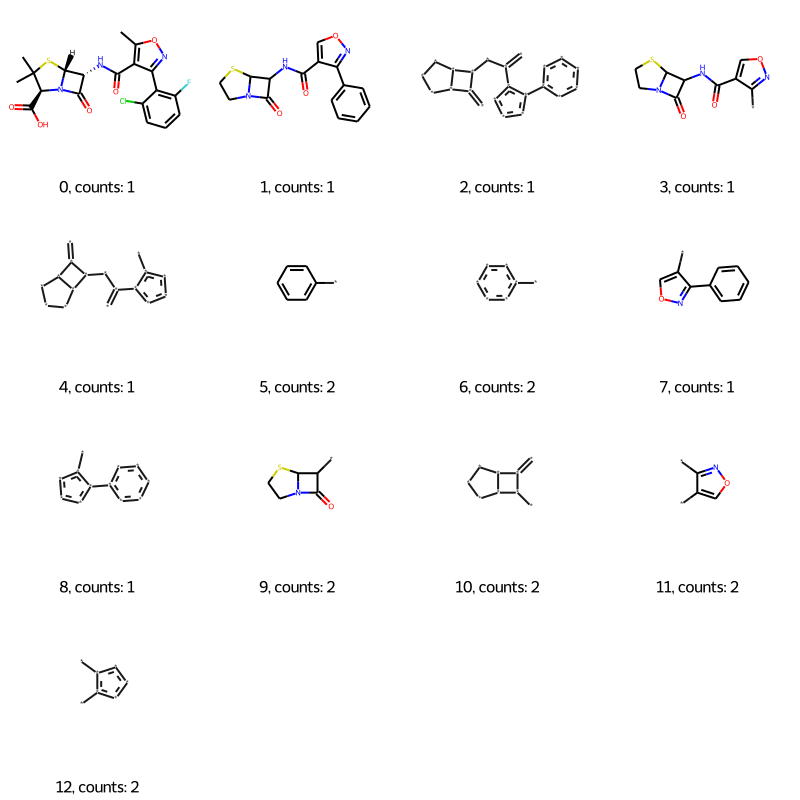

In [25]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([flu],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


In [2]:
helm_string = 'PEPTIDE1{L.L.M.M.G.F.L.L.F.V}$$$$V2.0'
pep = Chem.rdmolfiles.MolFromHELM(helm_string)

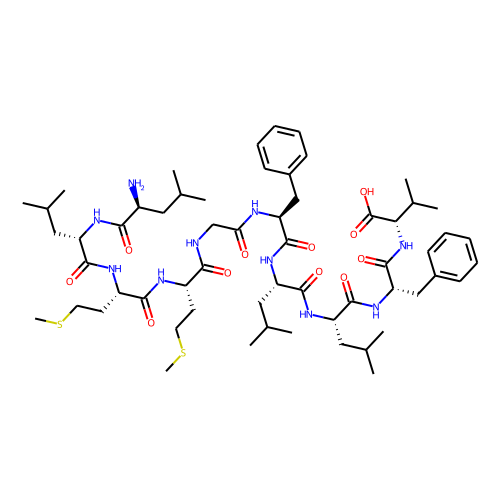

In [3]:
pep

In [67]:
helm_string = 'PEPTIDE1{L.L.M.M.G.F.L.L.F.K}$$$$V2.0'
pep = Chem.rdmolfiles.MolFromHELM(helm_string)

molhashf = rdMolHash.HashFunction.names

for i, j in molhashf.items():
    print(i, rdMolHash.MolHash(pep, j))

AnonymousGraph ******(**(*)*(**(*)*(**(*)*)**(*)*(**(*)*)**(*)*(**(*)***(*)*(****)**(*)*(****)**(*)*(**(*)*)**(*)*(*)**(*)*)**1*****1)**1*****1)*(*)*
ElementGraph CSCC[C@H](NC(O)[C@H](CCSC)NC(O)[C@H](CC(C)C)NC(O)[C@@H](N)CC(C)C)C(O)NCC(O)N[C@@H](CC1CCCCC1)C(O)N[C@@H](CC(C)C)C(O)N[C@@H](CC(C)C)C(O)N[C@@H](CC1CCCCC1)C(O)N[C@@H](CCCCN)C(O)O
CanonicalSmiles CSCC[C@H](NC(=O)[C@H](CCSC)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](N)CC(C)C)C(=O)NCC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)O
MurckoScaffold c1ccc(CCCNCCNCCNCCc2ccccc2)cc1
ExtendedMurcko *[C@@H](Cc1ccccc1)C(=*)N[C@@H](*)C(=*)N[C@@H](*)C(=*)N[C@H](*)Cc1ccccc1
MolFormula C60H97N11O11S2
AtomBondCounts 84,85
DegreeVector 0,25,36,23
Mesomer CSCC[C@H](N[C]([O])[C@H](CCSC)N[C]([O])[C@H](CC(C)C)N[C]([O])[C@@H](N)CC(C)C)[C]([O])NC[C]([O])N[C@@H](C[C]1[CH][CH][CH][CH][CH]1)[C]([O])N[C@@H](CC(C)C)[C]([O])N[C@@H](CC(C)C)[C]([O])N[C@@H](C[C]1[CH][CH][CH][CH][CH]1)[C]([O])N[C@@H](CCCCN)[C](

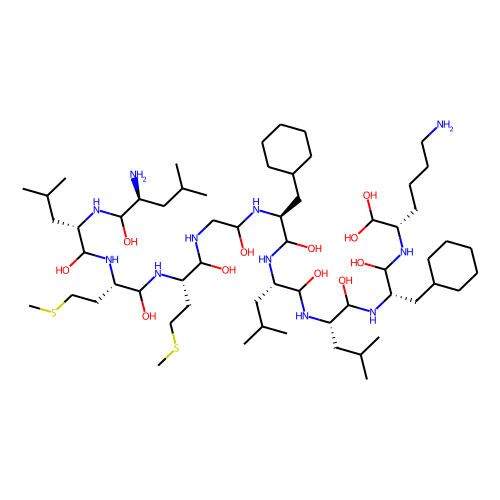

In [71]:
Chem.MolFromSmiles('CSCC[C@H](NC(O)[C@H](CCSC)NC(O)[C@H](CC(C)C)NC(O)[C@@H](N)CC(C)C)C(O)NCC(O)N[C@@H](CC1CCCCC1)C(O)N[C@@H](CC(C)C)C(O)N[C@@H](CC(C)C)C(O)N[C@@H](CC1CCCCC1)C(O)N[C@@H](CCCCN)C(O)O')

In [38]:
rot_atom_pairs = pep.GetSubstructMatches(RotatableBondSmarts)
set([pep.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs])

{1,
 3,
 4,
 7,
 8,
 10,
 11,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 26,
 27,
 28,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 46,
 47,
 48,
 50,
 51,
 54,
 55,
 56,
 58,
 59,
 62,
 63,
 64,
 66,
 67,
 74,
 75,
 76,
 78,
 81,
 82,
 83,
 85,
 88}

((0, 1, 2, 3, 8), (8, 9, 10, 11, 16), (16, 17, 18, 19, 24), (24, 25, 26, 27, 32), (36, 37, 38, 39, 47), (47, 48, 49, 50, 55), (55, 56, 57, 58, 63), (63, 64, 65, 66, 74), (74, 75, 76, 77, 81))
9


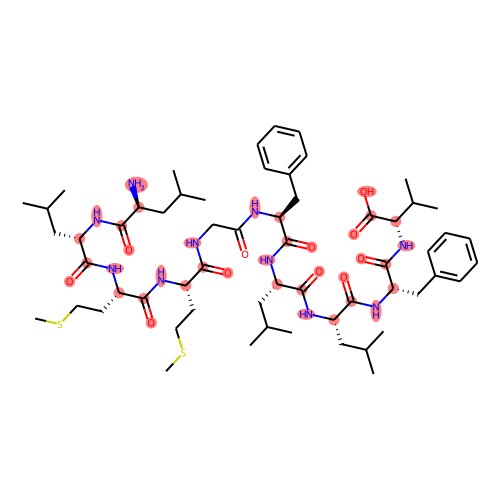

In [4]:
substructure = Chem.MolFromSmarts('[NX3,NX4+][CX4H][CX3](=[OX1])[O,N]')
print(pep.GetSubstructMatches(substructure))
print(len(pep.GetSubstructMatches(substructure)))
pep

In [34]:
AA_smarts = ['[CH3X4]',
             '[CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]',
             '[CH2X4][CX3](=[OX1])[NX3H2]',
             '[CH2X4][CX3](=[OX1])[OH0-,OH]',
             '[CH2X4][SX2H,SX1H0-]',
             '[CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]',
             'N[CX4H2][CX3](=[OX1])[O,N]',
             '[CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]1',
             '[CHX4]([CH3X4])[CH2X4][CH3X4]',
             '[CH2X4][CHX4]([CH3X4])[CH3X4]',
             '[CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]',
             '[CH2X4][CH2X4][SX2][CH3X4]',
             '[CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1',
             'N1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[O,N]',
             '[CH2X4][OX2H]',
             '[CHX4]([CH3X4])[OX2H]',
             '[CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12',
             '[CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1',
             '[CHX4]([CH3X4])[CH3X4]']

In [37]:
Chem.MolToSmarts(pep)

'[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6]-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#8])-[#6](-[#6])-[#6])-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]-[#6](-[#6])-[#6])-[#6]-[#6](-[#6])-[#6])-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]-[#6]-[#16]-[#6])-[#6]-[#6]-[#16]-[#6])-[#6]-[#6](-[#6])-[#6])-[#6]-[#6](-[#6])-[#6]'

In [36]:
smarts = '.'.join(['(%s)' % a for a in AA_smarts])
substructure = Chem.MolFromSmarts(smarts)
print(pep.GetSubstructMatches(substructure))
print(len(pep.GetSubstructMatches(substructure)))
pep

RDKit ERROR: [09:47:04] SMARTS Parse Error: syntax error while parsing: ([CH3X4]).([CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]).([CH2X4][CX3](=[OX1])[NX3H2]).([CH2X4][CX3](=[OX1])[OH0-,OH]).([CH2X4][SX2H,SX1H0-]).([CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]).(N[CX4H2][CX3](=[OX1])[O,N]).([CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H])_100,$([#7X3H])_101]:[#6X3H]:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H])_100,$([#7X3H])_101]:[#6X3H]1).([CHX4]([CH3X4])[CH2X4][CH3X4]).([CH2X4][CHX4]([CH3X4])[CH3X4]).([CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]).([CH2X4][CH2X4][SX2][CH3X4]).([CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1).(N1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[O,N]).([CH2X4][OX2H]).([CHX4]([CH3X4])[OX2H]).([CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12).([CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1).([CHX4]([CH3X4])[CH3X4])
RDKit ERROR: [09:47:04] SMARTS Parse Error: Failed parsing SMARTS '([CH3X4]).([CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[N

ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

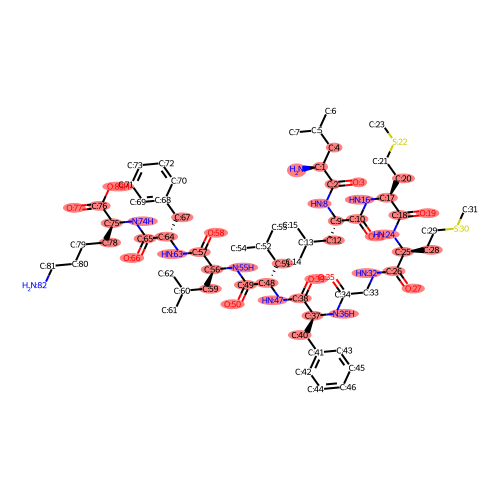

In [76]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(pep)

In [29]:
def find_bond_groups(mol):
    """Find groups of contiguous rotatable bonds and return them sorted by decreasing size"""
    rot_atom_pairs = mol.GetSubstructMatches(RotatableBondSmarts)
    rot_bond_set = set([mol.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs])
    rot_bond_groups = []
    while (rot_bond_set):
        i = rot_bond_set.pop()
        connected_bond_set = set([i])
        stack = [i]
        while (stack):
            i = stack.pop()
            b = mol.GetBondWithIdx(i)
            bonds = []
            for a in (b.GetBeginAtom(), b.GetEndAtom()):
                bonds.extend([b.GetIdx() for b in a.GetBonds() if (
                    (b.GetIdx() in rot_bond_set) and (not (b.GetIdx() in connected_bond_set)))])
            connected_bond_set.update(bonds)
            stack.extend(bonds)
        rot_bond_set.difference_update(connected_bond_set)
        rot_bond_groups.append(tuple(connected_bond_set))
    return tuple(sorted(rot_bond_groups, reverse = True, key = lambda x: len(x)))

In [30]:
# Find groups of contiguous rotatable bonds in mol
bond_groups = find_bond_groups(pep)
# As bond groups are sorted by decreasing size, the size of the first group (if any)
# is the largest number of contiguous rotatable bonds in mol
largest_n_cont_rot_bonds = len(bond_groups[0]) if bond_groups else 0

In [31]:
print(largest_n_cont_rot_bonds)

51


In [32]:
print(bond_groups)

((1, 3, 4, 7, 8, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 35, 36, 38, 39, 46, 47, 48, 50, 51, 54, 55, 56, 58, 59, 62, 63, 64, 66, 67, 74, 75, 76, 78, 81, 82, 83, 85, 88),)


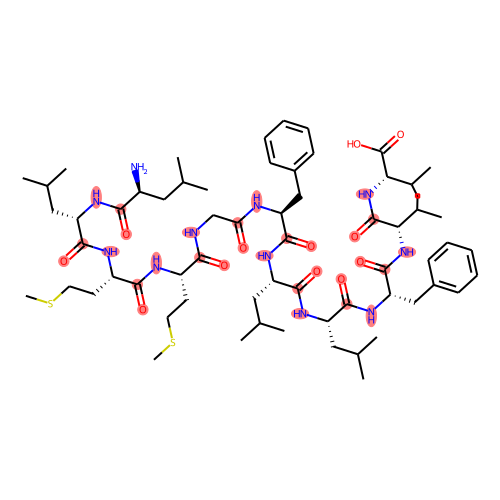

In [49]:
pep

In [34]:
# If this is important, then you need to pass the correct bond indices to MolFragmentToSmiles().
# This can be done by using the bonds in the query graph to get the bond indices in the molecule graph.
def get_match_bond_indices(query, mol, match_atom_indices):
    bond_indices = []
    for query_bond in query.GetBonds():
        atom_index1 = match_atom_indices[query_bond.GetBeginAtomIdx()]
        atom_index2 = match_atom_indices[query_bond.GetEndAtomIdx()]
        bond_indices.append(mol.GetBondBetweenAtoms(
             atom_index1, atom_index2).GetIdx())
    return bond_indices

In [8]:
if not os.path.isdir('./illu_net'):
    os.mkdir('./illu_net')
    
g = Network(notebook=True,height='600px',width='800px')

for i,n in enumerate(net.nodes):
    svg=moltosvg(Chem.MolFromSmiles(n))
    with open('./illu_net/{0}.svg'.format(i),'w') as outf:
        outf.write(svg)
    g.add_node(i,shape="image",label=' ',
               image ='./illu_net/{0}.svg'.format(i), title=svg, size=60)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
    
g.set_options(options="""{
  "edges": {
   "font":{
   "size":20
   }
  },
  "nodes": {
    "font": {
      "color": "rgba(214,47,66,1)",
      "size": 16,
      "face": "tahoma"
    }
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -120,
      "springLength": 200,
      "avoidOverlap": 0.42
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}""")
g.show("./scaffoldnetwork_illu_flu.html")

## Update network: Adding more molecules

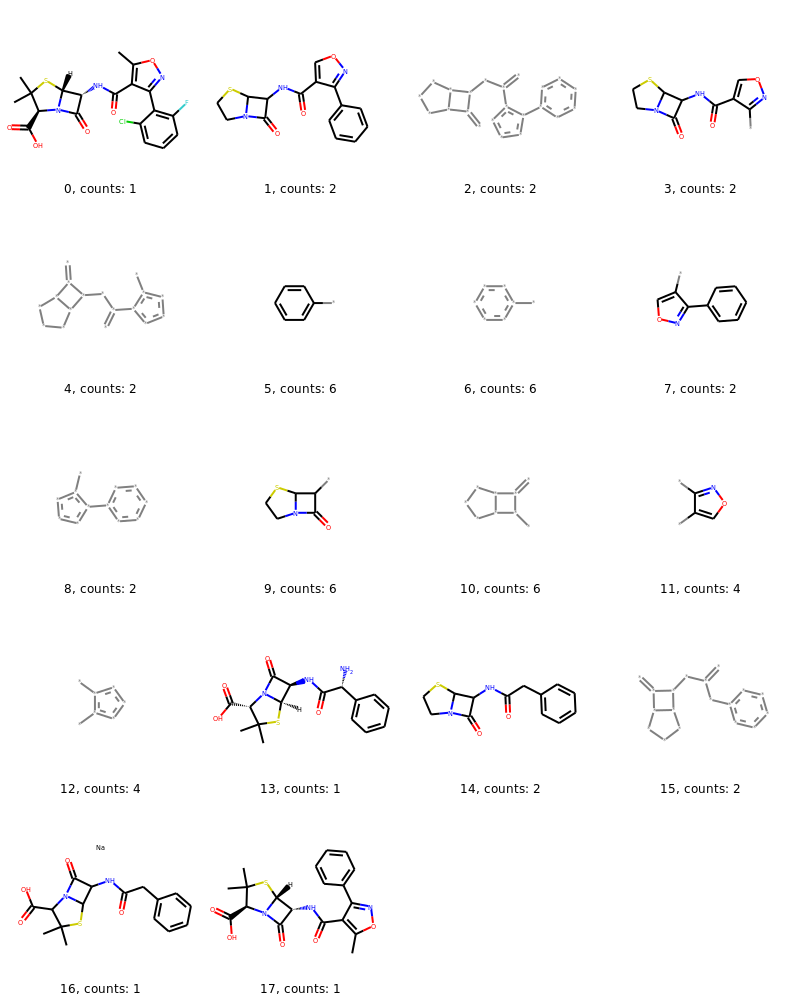

In [9]:
rdScaffoldNetwork.UpdateScaffoldNetwork([amp, pen, ox],net,params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


In [10]:
if not os.path.isdir('./illu_net'):
    os.mkdir('./illu_net')
    
g = Network(notebook=True,height='600px',width='800px')

for i,n in enumerate(net.nodes):
    svg=moltosvg(Chem.MolFromSmiles(n))
    with open('./illu_net/{0}.svg'.format(i),'w') as outf:
        outf.write(svg)
    g.add_node(i,shape="image",label=' ',
               image ='./illu_net/{0}.svg'.format(i), title=svg, size=60)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
    
g.set_options(options="""{
  "edges": {
   "font":{
   "size":20
   }
  },
  "nodes": {
    "font": {
      "color": "rgba(214,47,66,1)",
      "size": 16,
      "face": "tahoma"
    }
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -120,
      "springLength": 200,
      "avoidOverlap": 0.42
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}""")
g.show("./scaffoldnetwork_illu_antibiotics.html")